In [15]:
import pandas as pd
import numpy as np

df=pd.read_csv('/mnt/d/workspace/chung/tpl_mapped.csv')
df.shape

(445115, 6)

In [39]:
df.head(2)

,Unnamed: 0,rxn,rxn_class,split,new_rxn,reagent_separated
0,0,CC(C)O.COc1ccc2nccc([C@@H](O)CC[C@@H]3CCN(C4CC...,366,test,COc1ccc2nccc([C@@H](O)CC[C@@H]3CCN(C4CC(c5cccc...,CC(C)O.Cl.ClCCl.O.[Br-].[Br-].[Na+].[Zn+2]
1,1,CCCCSc1cc(C(=O)O)cc(S(N)(=O)=O)c1Cc1ccccc1.CCO...,47,test,CCO.NS(=O)(=O)c1cc(C(=O)O)cc(SCc2ccccc2)c1Cc1c...,CCCCSc1cc(C(=O)O)cc(S(N)(=O)=O)c1Cc1ccccc1.CO


In [16]:
df['rxn'].values

array(['CC(C)O.COc1ccc2nccc([C@@H](O)CC[C@@H]3CCN(C4CC(c5ccccc5)C4)C[C@@H]3C#N)c2c1.Cl.ClCCl.O.[Br-].[Br-].[N-]=[N+]=[N-].[Na+].[Zn+2]>>COc1ccc2nccc([C@@H](O)CC[C@@H]3CCN(C4CC(c5ccccc5)C4)C[C@@H]3c3nn[nH]n3)c2c1',
       'CCCCSc1cc(C(=O)O)cc(S(N)(=O)=O)c1Cc1ccccc1.CCO.CO.NS(=O)(=O)c1cc(C(=O)O)cc(SCc2ccccc2)c1Cc1ccccc1>>CCOC(=O)c1cc(SCc2ccccc2)c(Cc2ccccc2)c(S(N)(=O)=O)c1',
       'CCCCCCCCCCCCCCCCCCOc1ccc(C(=O)C(=O)N(CC(=O)OCC)CC(=O)OCC)cc1.CO.[Na+].[OH-]>>CCCCCCCCCCCCCCCCCCOc1ccc(C(=O)C(=O)N(CC(=O)O)CC(=O)O)cc1',
       ...,
       'CO.O=C(O)C(=O)C(=O)Nc1cccc([N+](=O)[O-])c1.[Pd]>>Nc1cccc(NC(=O)C(=O)C(=O)O)c1',
       'FC(F)Oc1ncc(CBr)cc1Br.OB(O)c1cccc(Cl)c1>>FC(F)Oc1ncc(CBr)cc1-c1cccc(Cl)c1',
       'CN(C)C=O.CN1CC(C)(C2=CCCCC2)CN(CC(O)c2ccccc2)C1=O.ClCCl.O.O=[Cr](=O)([O-])O[Cr](=O)(=O)[O-].c1cc[nH+]cc1.c1cc[nH+]cc1>>CN1CC(C)(C2=CCCCC2)CN(CC(=O)c2ccccc2)C1=O'],
      dtype=object)

In [41]:
df['reagent_separated'].values

array(['CC(C)O.Cl.ClCCl.O.[Br-].[Br-].[Na+].[Zn+2]',
       'CCCCSc1cc(C(=O)O)cc(S(N)(=O)=O)c1Cc1ccccc1.CO', 'CO.[Na+].[OH-]',
       ..., 'CO.[Pd]', nan,
       'CN(C)C=O.ClCCl.O.O=[Cr](=O)([O-])O[Cr](=O)(=O)[O-].c1cc[nH+]cc1.c1cc[nH+]cc1'],
      dtype=object)

In [32]:
dem=0
idx_list=[]
for idx,i in enumerate(df['rxn'].values):
    if '+6' in i or '-6' in i:
        idx_list.append(idx)

In [47]:
if '+2' in df['reagent_separated'].values[0]:
    print('yes')

yes


In [60]:
dem=0
idx_list1=[]
df=df.fillna('')
for idx,i in enumerate(df['reagent_separated'].values):
    if '+6' in i:
        idx_list.append(idx)

In [69]:
dem=0
idx_list2=[]
df=df.fillna('')
for idx,i in enumerate(df['reagent_separated'].values):
    if '+6' in i:
        idx_list2.append(idx)

In [75]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")



dem=0
idx_list2=[]
df=df.fillna('')
for idx,i in tqdm(enumerate(df['reagent_separated'].values)):
    for j in i.split('.'):
        mol=Chem.MolFromSmiles(j)
        list_charge=[a.GetFormalCharge() for a in mol.GetAtoms()]
        for i in list_charge:
            if np.abs(i)>5:
                if idx not in idx_list2:
                    idx_list2.append(idx)


idx_list=[]
data=data.fillna('')
for idx,i in tqdm(enumerate(data['reagent_separated'].values)):
    for j in i.split('.'):
        mol=Chem.MolFromSmiles(j)
        list_charge=[a.GetFormalCharge() for a in mol.GetAtoms()]
        for i in list_charge:
            if np.abs(i)>5:
                if idx not in idx_list:
                    idx_list.append(idx)
data=data.drop(idx_list)

0it [00:00, ?it/s][00:47:12] WARNING: not removing hydrogen atom without neighbors
[00:47:12] WARNING: not removing hydrogen atom without neighbors
[00:47:12] WARNING: not removing hydrogen atom without neighbors
[00:47:12] WARNING: not removing hydrogen atom without neighbors
[00:47:12] WARNING: not removing hydrogen atom without neighbors
[00:47:12] WARNING: not removing hydrogen atom without neighbors
[00:47:12] WARNING: not removing hydrogen atom without neighbors
[00:47:12] WARNING: not removing hydrogen atom without neighbors
[00:47:12] WARNING: not removing hydrogen atom without neighbors
[00:47:12] WARNING: not removing hydrogen atom without neighbors
[00:47:12] WARNING: not removing hydrogen atom without neighbors
[00:47:12] WARNING: not removing hydrogen atom without neighbors
[00:47:12] WARNING: not removing hydrogen atom without neighbors
[00:47:12] WARNING: not removing hydrogen atom without neighbors
[00:47:12] WARNING: not removing hydrogen atom without neighbors
[00:47:

KeyboardInterrupt: 

In [70]:
idx_list3=[]
for i in idx_list2:
    if i not in idx_list1:
        idx_list3.append(i)

In [67]:
idx_list3

[3432,
 7214,
 8247,
 14011,
 14443,
 20029,
 23274,
 25994,
 28373,
 32285,
 41421,
 41426,
 47950,
 54631,
 54994,
 61549,
 69941,
 73038,
 76599,
 77920,
 79256,
 83237,
 86224,
 87598,
 90333,
 90523,
 91042,
 93215,
 98421,
 105337,
 110365,
 117521,
 117988,
 123900,
 124349,
 125867,
 127553,
 127942,
 132380,
 132600,
 134381,
 140346,
 140499,
 149272,
 156344,
 157206,
 162835,
 168889,
 168908,
 183524,
 189929,
 201036,
 204424,
 204743,
 214111,
 215969,
 224249,
 232435,
 245463,
 251791,
 255433,
 257698,
 262183,
 271726,
 276084,
 280550,
 290112,
 293782,
 294273,
 295116,
 296117,
 305293,
 305582,
 312727,
 314558,
 324903,
 327133,
 327994,
 329561,
 332634,
 339645,
 339721,
 343204,
 353506,
 357611,
 360481,
 368837,
 373471,
 377080,
 378534,
 381367,
 386872,
 392149,
 393393,
 394409,
 396009,
 398899,
 400852,
 401599,
 407660,
 411158,
 411984,
 418550,
 420325,
 420734,
 422037,
 422228,
 427028]

In [58]:
len(idx_list)

0

In [4]:
df.drop(idx_list,inplace=True)

In [26]:
dem=0
idx_list1=[]
for idx,i in enumerate(df['rxn'].values):
    if '6' in i:
        idx_list1.append(idx)

In [68]:
df['rxn'][idx_list3[0]]

'CC(C)(C)OC(=O)N1CCC(c2ncc(-c3ccc(-c4ccc(-c5cnc(C6CCCN6C(=O)OC(C)(C)C)[nH]5)cc4)cc3)[nH]2)C1.CC(C)(C)OC(=O)N1CCCC1.CC(C)(C)OC(=O)N1CCCC1c1ncc(-c2ccc(B3OC(C)(C)C(C)(C)O3)cc2)[nH]1.COC(=O)NC(C(=O)N1C2CCC(C2)C1c1ncc(-c2ccc(B3OC(C)(C)C(C)(C)O3)cc2)[nH]1)C(C)C.COC(=O)NC(C(=O)N1CCCC1c1ncc(-c2ccc(Br)cc2)[nH]1)C(C)C>>COC(=O)NC(C(=O)N1CCCC1c1ncc(-c2ccc(-c3ccc(-c4cnc(C5C6CCC(C6)N5C(=O)C(NC(=O)OC)C(C)C)[nH]4)cc3)cc2)[nH]1)C(C)C'

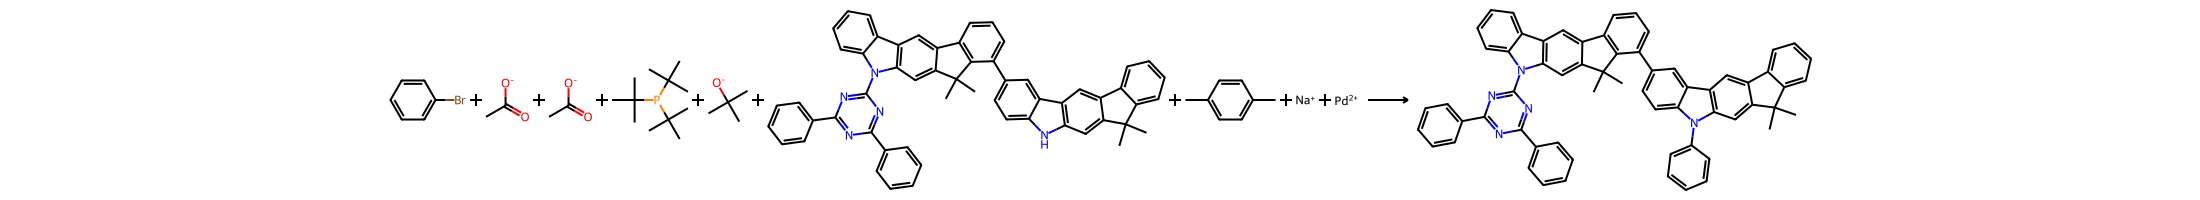

In [37]:
from rdkit.Chem import AllChem, Draw

rxn=df['rxn'][idx_list[0]]
rxn_chem=AllChem.ReactionFromSmarts(rxn,useSmiles=True)
Draw.ReactionToImage(rxn_chem)